# 🏭 Système de Suivi Énergétique - Notebook Jupyter

Ce notebook exécute le projet complet en local

## 1️⃣ Importer les modules

In [42]:
import sys
from pathlib import Path

# Ajouter le répertoire courant au chemin Python
sys.path.insert(0, str(Path.cwd()))

# Importer les modules
from capteur import Capteur, Lecture
from gestionnaire import GestionnaireCapteurs
from base_donnees import BaseDonnees
from anomalies import DetecteurAnomalies

print("✅ Tous les modules importés avec succès!")

✅ Tous les modules importés avec succès!


## 2️⃣ Tâche 3.1 - Simulation des capteurs

In [43]:
# Créer le gestionnaire de capteurs
gestionnaire = GestionnaireCapteurs()

# Ajouter les capteurs
capteurs_config = [
    ("CAP_POMPE_01", "pompe", "Bassin de réception"),
    ("CAP_POMPE_02", "pompe", "Bassin de traitement"),
    ("CAP_COMPRESSEUR_01", "compresseur", "Station aération"),
    ("CAP_ECLAIRAGE_01", "eclairage", "Salle de contrôle"),
    ("CAP_VENTILATION_01", "ventilation", "Zone de traitement"),
]

print("🏭 INITIALISATION - Unité de traitement des eaux\\n")
for capteur_id, type_eq, localisation in capteurs_config:
    capteur = Capteur(capteur_id, type_eq, localisation)
    gestionnaire.ajouter_capteur(capteur)
    print(f"✓ {capteur_id:<20} | {type_eq:<15} | {localisation}")

print(f"\\n✅ Total : {gestionnaire.obtenir_nombre_capteurs()} capteurs actifs")

🏭 INITIALISATION - Unité de traitement des eaux\n
✓ CAP_POMPE_01         | pompe           | Bassin de réception
✓ CAP_POMPE_02         | pompe           | Bassin de traitement
✓ CAP_COMPRESSEUR_01   | compresseur     | Station aération
✓ CAP_ECLAIRAGE_01     | eclairage       | Salle de contrôle
✓ CAP_VENTILATION_01   | ventilation     | Zone de traitement
\n✅ Total : 5 capteurs actifs


## 3️⃣ Première lecture des capteurs

In [44]:
# Effectuer une lecture
print("\\n📈 PREMIÈRE LECTURE DES CAPTEURS\\n")
print(f"{'Capteur':<20} | {'Valeur':<10} | {'Timestamp'}")
print("-" * 60)

lectures = gestionnaire.lire_tous_les_capteurs()
for lecture in lectures:
    print(f"{lecture.capteur_id:<20} | {lecture.valeur:>7.2f} {lecture.unite:<5} | {lecture.timestamp}")

print(f"\\n✅ Lecture complète : {len(lectures)} mesures enregistrées")

\n📈 PREMIÈRE LECTURE DES CAPTEURS\n
Capteur              | Valeur     | Timestamp
------------------------------------------------------------
CAP_POMPE_01         |    2.13 kW    | 2025-12-17T14:19:15.733361
CAP_POMPE_02         |    2.24 kW    | 2025-12-17T14:19:15.733373
CAP_COMPRESSEUR_01   |    2.81 kW    | 2025-12-17T14:19:15.733378
CAP_ECLAIRAGE_01     |    0.26 kW    | 2025-12-17T14:19:15.733383
CAP_VENTILATION_01   |    0.62 kW    | 2025-12-17T14:19:15.733387
\n✅ Lecture complète : 5 mesures enregistrées


## 4️⃣ Tâche 3.2 - Stockage en JSON

In [45]:
# Créer la base de données
bd = BaseDonnees("donnees_capteurs.json")

print("\\n💾 STOCKAGE EN JSON\\n")

# Convertir les lectures en format dict et stocker
for lecture in lectures:
    capteur = gestionnaire.capteurs[lecture.capteur_id]
    lecture_dict = lecture.to_dict()
    lecture_dict["type_equipement"] = capteur.type_equipement
    bd.inserer(lecture_dict)

print(f"✅ Données stockées : {bd.compter()} enregistrements")

# Afficher les infos de la base
info = bd.obtenir_info()
print(f"\\n📊 Informations base de données :")
print(f"  • Fichier : {info['chemin']}")
print(f"  • Total enregistrements : {info['nombre_lectures']}")
print(f"  • Capteurs uniques : {info['nombre_capteurs_uniques']}")

\n💾 STOCKAGE EN JSON\n
✅ Données stockées : 90 enregistrements
\n📊 Informations base de données :
  • Fichier : donnees_capteurs.json
  • Total enregistrements : 90
  • Capteurs uniques : 5


## 5️⃣ Opérations sur la base - Filtrage et statistiques

In [46]:
print("\\n📊 OPÉRATIONS SUR LA BASE DE DONNÉES\\n")

# Récupérer les données par capteur
print("Lectures CAP_POMPE_01 :")
pompe_data = bd.obtenir_par_capteur("CAP_POMPE_01")
for data in pompe_data:
    print(f"  • {data['valeur']:.2f} {data['unite']} @ {data['timestamp']}")

# Récupérer par type
print(f"\\nNombre de pompes enregistrées : {len(bd.obtenir_par_type('pompe'))}")
print(f"Nombre de compresseurs enregistrés : {len(bd.obtenir_par_type('compresseur'))}")

# Statistiques globales
print("\\n📈 Statistiques globales :")
stats = bd.statistiques()
for key, value in stats.items():
    print(f"  • {key:<15} : {value}")

\n📊 OPÉRATIONS SUR LA BASE DE DONNÉES\n
Lectures CAP_POMPE_01 :
  • 1.16 kW @ 2025-12-17T12:52:41.875540
  • 1.73 kW @ 2025-12-17T12:52:41.875573
  • 2.96 kW @ 2025-12-17T12:52:41.875622
  • 1.95 kW @ 2025-12-17T14:06:58.286889
  • 2.55 kW @ 2025-12-17T14:07:11.483478
  • 2.01 kW @ 2025-12-17T14:07:11.549826
  • 2.86 kW @ 2025-12-17T14:07:11.600738
  • 0.58 kW @ 2025-12-17T14:14:21.627129
  • 0.58 kW @ 2025-12-17T14:14:21.627129
  • 2.57 kW @ 2025-12-17T14:15:00.366100
  • 1.92 kW @ 2025-12-17T14:15:08.129535
  • 1.56 kW @ 2025-12-17T14:15:08.214814
  • 2.70 kW @ 2025-12-17T14:15:08.289502
  • 0.62 kW @ 2025-12-17T14:17:28.741449
  • 1.89 kW @ 2025-12-17T14:17:29.911833
  • 1.84 kW @ 2025-12-17T14:17:30.011272
  • 0.77 kW @ 2025-12-17T14:17:30.080583
  • 2.13 kW @ 2025-12-17T14:19:15.733361
\nNombre de pompes enregistrées : 30
Nombre de compresseurs enregistrés : 15
\n📈 Statistiques globales :
  • count           : 90
  • min             : 0.24
  • max             : 7.22
  • moyenne   

## 6️⃣ Exécuter plusieurs cycles (enrichir les données)

In [47]:
print("\\n🔄 CYCLES SUPPLÉMENTAIRES\\n")

# Exécuter 3 cycles supplémentaires
for cycle in range(1, 4):
    lectures = gestionnaire.lire_tous_les_capteurs()
    
    for lecture in lectures:
        capteur = gestionnaire.capteurs[lecture.capteur_id]
        lecture_dict = lecture.to_dict()
        lecture_dict["type_equipement"] = capteur.type_equipement
        bd.inserer(lecture_dict)
    
    print(f"✓ Cycle {cycle} : {len(lectures)} lectures ajoutées (Total: {bd.compter()})")

print(f"\\n✅ Total enregistrements : {bd.compter()}")

\n🔄 CYCLES SUPPLÉMENTAIRES\n
✓ Cycle 1 : 5 lectures ajoutées (Total: 95)
✓ Cycle 2 : 5 lectures ajoutées (Total: 100)
✓ Cycle 3 : 5 lectures ajoutées (Total: 105)
\n✅ Total enregistrements : 105


## 7️⃣ Tâche 3.3 - Détection d'anomalies

In [48]:
# Créer le détecteur
detecteur = DetecteurAnomalies()

print("\\n⚠️  DÉTECTION D'ANOMALIES\\n")

# Récupérer toutes les données
donnees = bd.obtenir_tous()

# Analyser
donnees_analysees = detecteur.detecter_anomalies(donnees)

# Compter les anomalies
anomalies = [d for d in donnees_analysees if d.get('anomalie', False)]
print(f"Total données : {len(donnees_analysees)}")
print(f"Anomalies détectées : {len(anomalies)}")

# Afficher quelques anomalies
if anomalies:
    print(f"\\n🚨 Exemples d'anomalies (max 5) :\\n")
    for anom in anomalies[:5]:
        print(f"  • {anom['capteur_id']:<20} | {anom['valeur']:>7.2f} {anom['unite']:<5} | {anom['type_anomalie']}")
else:
    print("\\n✅ Aucune anomalie détectée!")

\n⚠️  DÉTECTION D'ANOMALIES\n
Total données : 105
Anomalies détectées : 0
\n✅ Aucune anomalie détectée!


## 8️⃣ Rapport détaillé des anomalies

In [49]:
# Générer le rapport
rapport = detecteur.rapport_anomalies(donnees_analysees)

print("\\n" + "="*70)
print("📊 RAPPORT D'ANOMALIES")
print("="*70)

print(f"\\n📈 Résumé général :")
print(f"  • Total lectures : {rapport['nombre_total']}")
print(f"  • Anomalies détectées : {rapport['nombre_anomalies']}")
print(f"  • Pourcentage : {rapport['pourcentage_anomalies']}%")

if rapport['anomalies_par_type']:
    print(f"\\n🏭 Anomalies par type d'équipement :")
    for type_eq, count in rapport['anomalies_par_type'].items():
        print(f"  • {type_eq:<15} : {count} anomalies")

if rapport['anomalies_par_capteur']:
    print(f"\\n📡 Anomalies par capteur :")
    for capteur_id, count in rapport['anomalies_par_capteur'].items():
        if count > 0:
            print(f"  • {capteur_id:<20} : {count} anomalies")

if rapport['types_anomalies']:
    print(f"\\n⚠️  Types d'anomalies :")
    for type_anom, count in rapport['types_anomalies'].items():
        print(f"  • {type_anom:<50} : {count} fois")

print("\\n" + "="*70)

\n======================================================================
📊 RAPPORT D'ANOMALIES
\n📈 Résumé général :
  • Total lectures : 105
  • Anomalies détectées : 0
  • Pourcentage : 0.0%
\n======================================================================


## 9️⃣ Statistiques détaillées par capteur

In [50]:
import pandas as pd

print("\\n📊 STATISTIQUES DÉTAILLÉES PAR CAPTEUR\\n")

# Créer un dataframe des données
df = pd.DataFrame(donnees_analysees)

# Afficher les statistiques par capteur
for capteur_id in df['capteur_id'].unique():
    df_capteur = df[df['capteur_id'] == capteur_id]
    print(f"\\n{capteur_id}:")
    print(f"  • Mesures : {len(df_capteur)}")
    print(f"  • Min : {df_capteur['valeur'].min():.2f} kW")
    print(f"  • Max : {df_capteur['valeur'].max():.2f} kW")
    print(f"  • Moyenne : {df_capteur['valeur'].mean():.2f} kW")
    print(f"  • Écart-type : {df_capteur['valeur'].std():.2f} kW")
    anom_count = len(df_capteur[df_capteur['anomalie'] == True])
    print(f"  • Anomalies : {anom_count}")

\n📊 STATISTIQUES DÉTAILLÉES PAR CAPTEUR\n
\nCAP_POMPE_01:
  • Mesures : 21
  • Min : 0.56 kW
  • Max : 2.96 kW
  • Moyenne : 1.72 kW
  • Écart-type : 0.78 kW
  • Anomalies : 0
\nCAP_POMPE_02:
  • Mesures : 21
  • Min : 0.61 kW
  • Max : 2.72 kW
  • Moyenne : 1.73 kW
  • Écart-type : 0.77 kW
  • Anomalies : 0
\nCAP_COMPRESSEUR_01:
  • Mesures : 21
  • Min : 2.25 kW
  • Max : 7.44 kW
  • Moyenne : 4.72 kW
  • Écart-type : 1.76 kW
  • Anomalies : 0
\nCAP_ECLAIRAGE_01:
  • Mesures : 21
  • Min : 0.24 kW
  • Max : 1.34 kW
  • Moyenne : 0.74 kW
  • Écart-type : 0.35 kW
  • Anomalies : 0
\nCAP_VENTILATION_01:
  • Mesures : 21
  • Min : 0.32 kW
  • Max : 1.91 kW
  • Moyenne : 1.26 kW
  • Écart-type : 0.55 kW
  • Anomalies : 0


## 🔟 Visualisation avec graphiques

C:\Users\Zbook\AppData\Local\Temp\ipykernel_4832\3298765240.py:46: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


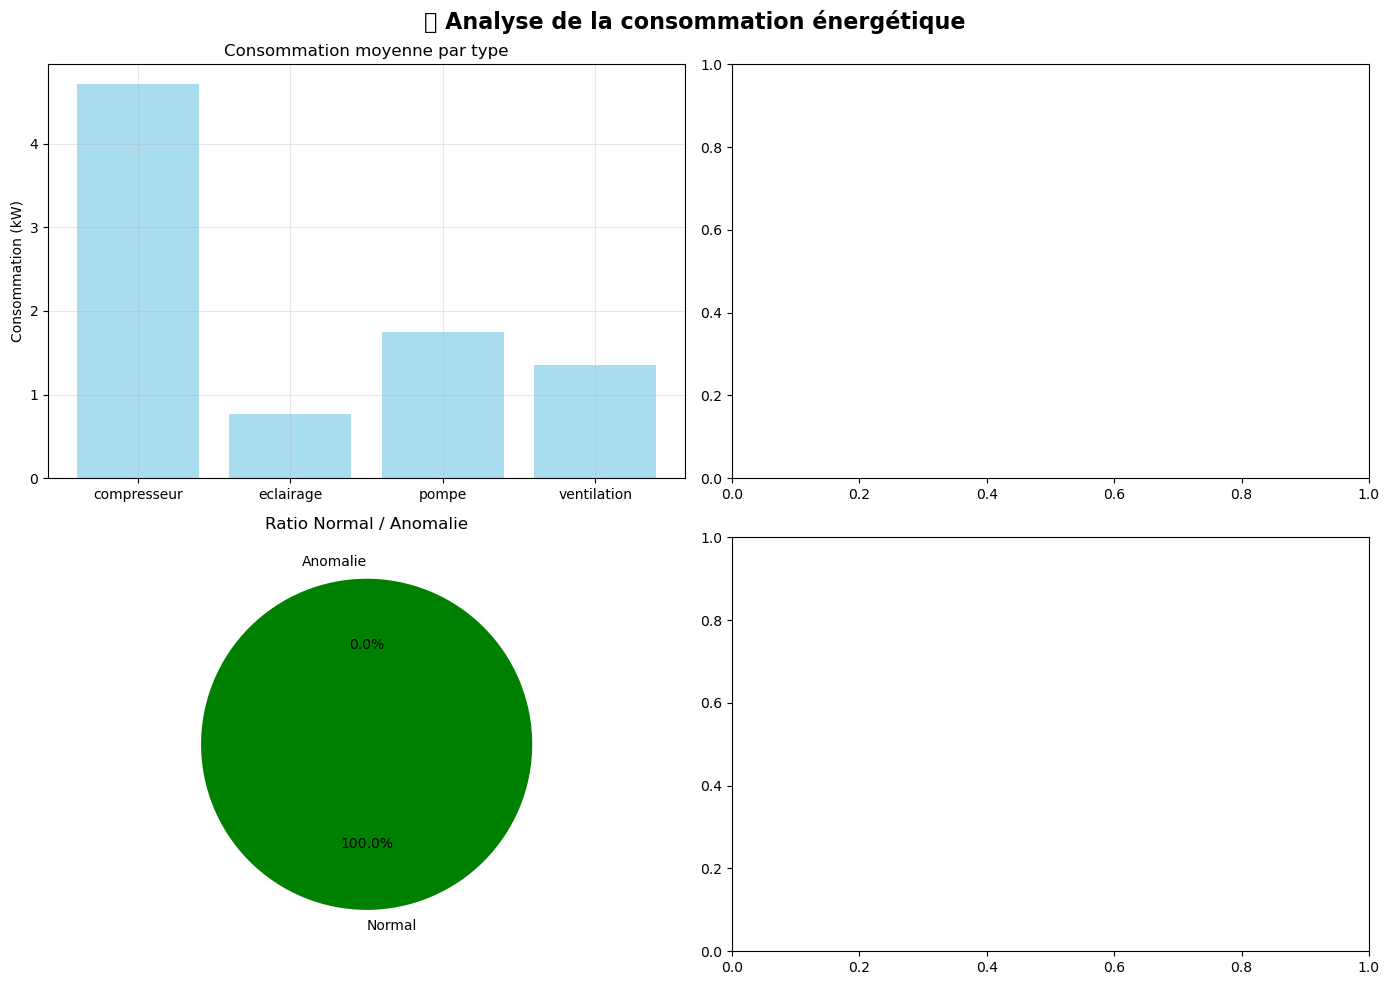

\n✅ Graphiques générés!


In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Créer un dataframe
df = pd.DataFrame(donnees_analysees)

# Graphique 1 : Distribution par type d'équipement
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('📊 Analyse de la consommation énergétique', fontsize=16, fontweight='bold')

# Graphique 1 : Moyenne par type
ax1 = axes[0, 0]
moyennes = df.groupby('type_equipement')['valeur'].mean()
ax1.bar(moyennes.index, moyennes.values, color='skyblue', alpha=0.7)
ax1.set_title('Consommation moyenne par type')
ax1.set_ylabel('Consommation (kW)')
ax1.grid(True, alpha=0.3)

# Graphique 2 : Anomalies par type
ax2 = axes[0, 1]
anomalies_par_type = rapport['anomalies_par_type']
if anomalies_par_type:
    ax2.bar(anomalies_par_type.keys(), anomalies_par_type.values(), color='red', alpha=0.7)
    ax2.set_title('Nombre d\'anomalies par type')
    ax2.set_ylabel('Nombre d\'anomalies')
    ax2.grid(True, alpha=0.3)

# Graphique 3 : Ratio anomalies
ax3 = axes[1, 0]
labels = ['Normal', 'Anomalie']
sizes = [rapport['nombre_total'] - rapport['nombre_anomalies'], rapport['nombre_anomalies']]
colors = ['green', 'red']
ax3.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax3.set_title('Ratio Normal / Anomalie')

# Graphique 4 : Types d'anomalies
ax4 = axes[1, 1]
types_anom = rapport['types_anomalies']
if types_anom:
    ax4.barh(list(types_anom.keys()), list(types_anom.values()), color='orange', alpha=0.7)
    ax4.set_title('Types d\'anomalies détectées')
    ax4.set_xlabel('Nombre de fois')
    ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\\n✅ Graphiques générés!")

## 1️⃣1️⃣ Export des données

In [52]:
import json

print("\\n💾 EXPORT DES DONNÉES\\n")

# Export CSV
#bd.exporter_csv("export_donnees.csv")
#print("✅ Export CSV réussi : export_donnees.csv")

# Export JSON avec anomalies
with open("export_avec_anomalies.json", 'w', encoding='utf-8') as f:
    json.dump(donnees_analysees, f, indent=2, ensure_ascii=False)
print("✅ Export JSON avec anomalies réussi : export_avec_anomalies.json")

# Export rapport
with open("rapport_anomalies.json", 'w', encoding='utf-8') as f:
    json.dump(rapport, f, indent=2, ensure_ascii=False)
print("✅ Export rapport réussi : rapport_anomalies.json")

\n💾 EXPORT DES DONNÉES\n
✅ Export JSON avec anomalies réussi : export_avec_anomalies.json
✅ Export rapport réussi : rapport_anomalies.json


## 1️⃣2️⃣ Résumé final

In [53]:
print("\\n" + "="*70)
print("🎉 RÉSUMÉ FINAL")
print("="*70)

print(f"\\n📊 Statistiques du projet :")
print(f"  ✅ Capteurs simulés : {gestionnaire.obtenir_nombre_capteurs()}")
print(f"  ✅ Lectures effectuées : {gestionnaire.obtenir_nombre_lectures()}")
print(f"  ✅ Données stockées : {bd.compter()}")
print(f"  ✅ Anomalies détectées : {rapport['nombre_anomalies']}")
print(f"  ✅ Pourcentage anomalies : {rapport['pourcentage_anomalies']}%")

print(f"\\n📁 Fichiers générés :")
print(f"  • donnees_capteurs.json (base de données)")
print(f"  • export_donnees.csv")
print(f"  • export_avec_anomalies.json")
print(f"  • rapport_anomalies.json")

print(f"\\n✅ Projet complet et fonctionnel!")
print("="*70)

\n======================================================================
🎉 RÉSUMÉ FINAL
\n📊 Statistiques du projet :
  ✅ Capteurs simulés : 5
  ✅ Lectures effectuées : 20
  ✅ Données stockées : 105
  ✅ Anomalies détectées : 0
  ✅ Pourcentage anomalies : 0.0%
\n📁 Fichiers générés :
  • donnees_capteurs.json (base de données)
  • export_donnees.csv
  • export_avec_anomalies.json
  • rapport_anomalies.json
\n✅ Projet complet et fonctionnel!
